In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset.csv")

#Data Check


In [ ]:
data.head(25)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [ ]:
print(data.shape)

(4424, 35)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#Data Cleaning


In [ ]:
data.rename(columns = {"Nacionality": "Nationality",
                           "Mother's qualification": "Mother_qualification",
                           "Father's qualification": "Father_qualification",
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation",
                           "Age at enrollment": "Age"}, inplace = True)

data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('(', '')
data.columns = data.columns.str.replace(')', '')

In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Missing values in each column:
 Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime/evening_attendance                      0
Previous_qualification                          0
Nationality                                     0
Mother_qualification                            0
Father_qualification                            0
Mother_occupation                               0
Father_occupation                               0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age                                             0
International                                   0
Curricular_units_1

In [ ]:

data = data[data['Target'] != 'Enrolled']

print(data['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64


In [ ]:
print(data.shape)

(3630, 35)


In [ ]:
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

data[col] = data[col].astype('category')

<ipython-input-12-164af3c4a409>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype('category')


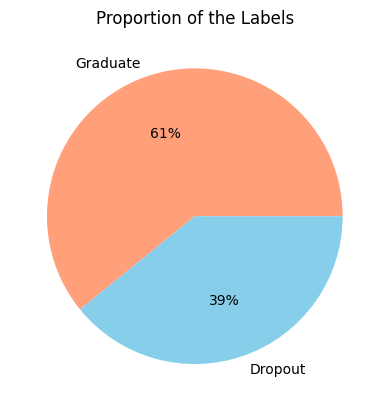

In [ ]:
labels = data['Target'].value_counts().index
values = data['Target'].value_counts().values

plt.pie(values, labels = labels, colors = ['lightsalmon', 'skyblue'], autopct = '%1.0f%%')
plt.title('Proportion of the Labels');

In [ ]:
data['Target_encoded'] = OrdinalEncoder(categories = [['Dropout','Graduate']]).fit_transform(data[['Target']])
data.drop('Target', axis = 1, inplace = True)

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    mean = data[col].mean()
    std = data[col].std()
    outliers = (data[col] < (mean - 3 * std)) | (data[col] > (mean + 3 * std))
    print(f"Outliers in {col}: {outliers.sum()}")


    data = data[~outliers]

print("Data after removing outliers:\n", data)

Outliers in Age: 91
Outliers in Curricular_units_1st_sem_credited: 102
Outliers in Curricular_units_1st_sem_enrolled: 217
Outliers in Curricular_units_1st_sem_evaluations: 25
Outliers in Curricular_units_1st_sem_approved: 0
Outliers in Curricular_units_1st_sem_grade: 0
Outliers in Curricular_units_1st_sem_without_evaluations: 79
Outliers in Curricular_units_2nd_sem_credited: 96
Outliers in Curricular_units_2nd_sem_enrolled: 12
Outliers in Curricular_units_2nd_sem_evaluations: 17
Outliers in Curricular_units_2nd_sem_approved: 0
Outliers in Curricular_units_2nd_sem_grade: 0
Outliers in Curricular_units_2nd_sem_without_evaluations: 54
Outliers in Unemployment_rate: 0
Outliers in Inflation_rate: 0
Outliers in GDP: 0
Outliers in Target_encoded: 0
Data after removing outliers:
      Marital_status Application_mode Application_order Course  \
1                 1                6                 1     11   
2                 1                1                 5      5   
3                 1   

In [ ]:

X = data.drop('Target_encoded', axis=1)
y = data['Target_encoded']

print(f"Original target distribution: {Counter(y)}")

undersample = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersample.fit_resample(X, y)

print(f"Target distribution after Under-sampling: {Counter(y_resampled_under)}")

# アンダーサンプリングしたデータを新しいデータフレームに結合
data_resampled = pd.DataFrame(X_resampled_under, columns=X.columns)
data_resampled['Target_encoded'] = y_resampled_under

# 元のデータフレームに保存
data = data_resampled

# 保存したデータの確認
print(data.head())


Original target distribution: Counter({1.0: 1857, 0.0: 1080})
Target distribution after Under-sampling: Counter({0.0: 1080, 1.0: 1080})
   Marital_status Application_mode Application_order Course  \
2               1                1                 5      5   
7               1                9                 4     11   
9               1                1                 1     10   
12              1                1                 2     16   
15              1                1                 1     15   

   Daytime/evening_attendance Previous_qualification Nationality  \
2                           1                      1           1   
7                           1                      1           1   
9                           1                      1           1   
12                          1                      1           1   
15                          1                      1           1   

   Mother_qualification Father_qualification Mother_occupation  ...  \
2    

#EDA

In [ ]:
cats = ['Marital_status', 'Application_mode', 'Application_order',
        'Course','Daytime/evening_attendance', 'Previous_qualification',
        'Nationality','Mother_qualification', 'Father_qualification',
        'Mother_occupation', 'Father_occupation', 'Displaced',
        'Educational_special_needs', 'Debtor','Tuition_fees_up_to_date',
        'Gender', 'Scholarship_holder','International']


p_value = []

for col in cats:
    crosstable = pd.crosstab(index = data[col],
                             columns = data['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Variable,P_value
0,Marital_status,0.00000
1,Application_mode,0.00000
2,Application_order,0.00000
3,Course,0.00000
4,Daytime/evening_attendance,0.00000
5,Previous_qualification,0.00000
15,Gender,0.00000
7,Mother_qualification,0.00000
16,Scholarship_holder,0.00000
9,Mother_occupation,0.00000


In [ ]:
stud_selected = data.drop(['Nationality', 'International', 'Educational_special_needs'],
                              axis = 1)

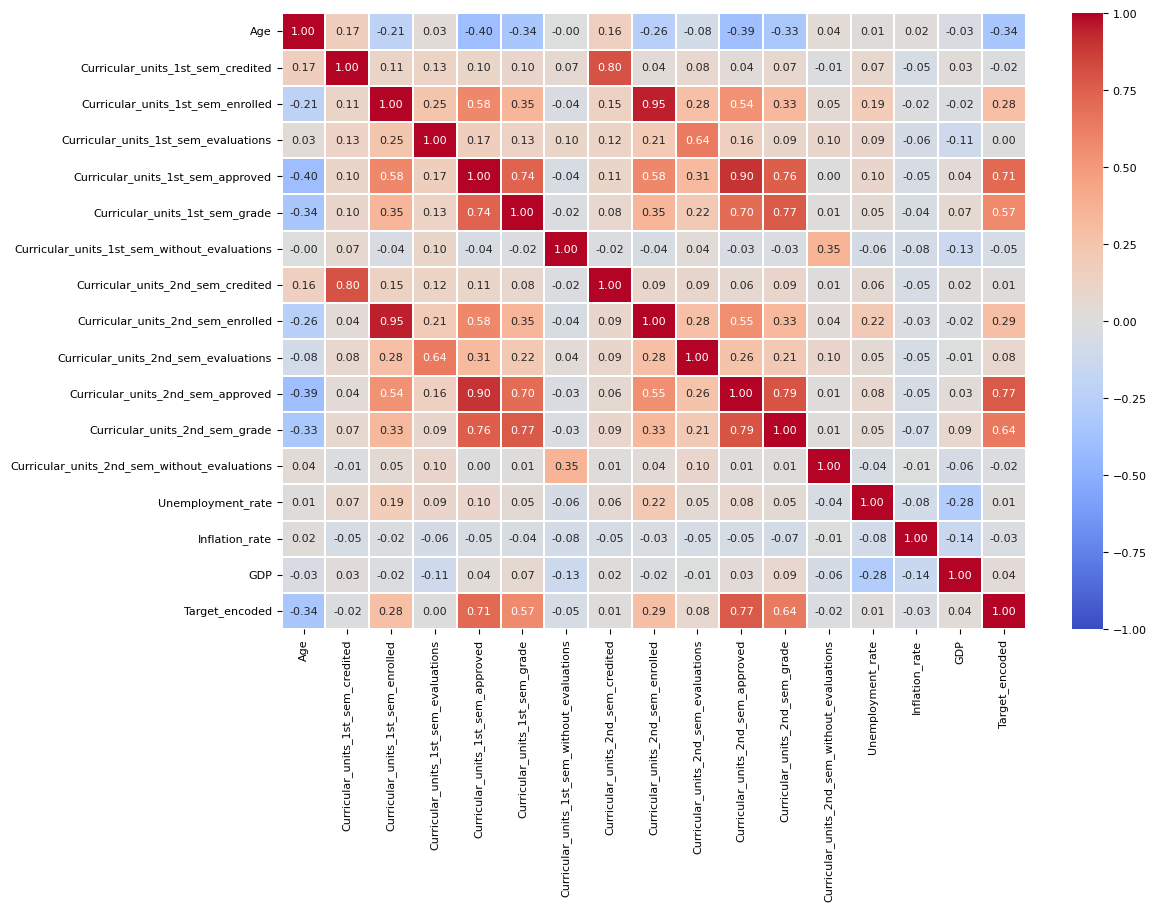

In [ ]:
num_features = data[['Age',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved',
       'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved',
       'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations',
       'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target_encoded']]

# Heatmap of correlation matrix
plt.figure(figsize = (12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(num_features.corr(method = 'spearman'),
                 cmap = 'coolwarm', annot = True, fmt = '.2f',
                 linewidths = .2, vmin = -1, vmax = 1, center = 0)

In [ ]:
# Averaging academic performance data across two semesters
stud_selected['curri_avg_credited'] = stud_selected[['Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited']].mean(axis = 1)
stud_selected['curri_avg_enrolled'] = stud_selected[['Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled']].mean(axis = 1)
stud_selected['curri_avg_evaluations'] = stud_selected[['Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_evaluations']].mean(axis = 1)
stud_selected['curri_avg_approved'] = stud_selected[['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved']].mean(axis = 1)
stud_selected['curri_avg_grade'] = stud_selected[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].mean(axis = 1)
stud_selected['curri_avg_without_evaluations'] = stud_selected[['Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations']].mean(axis = 1)

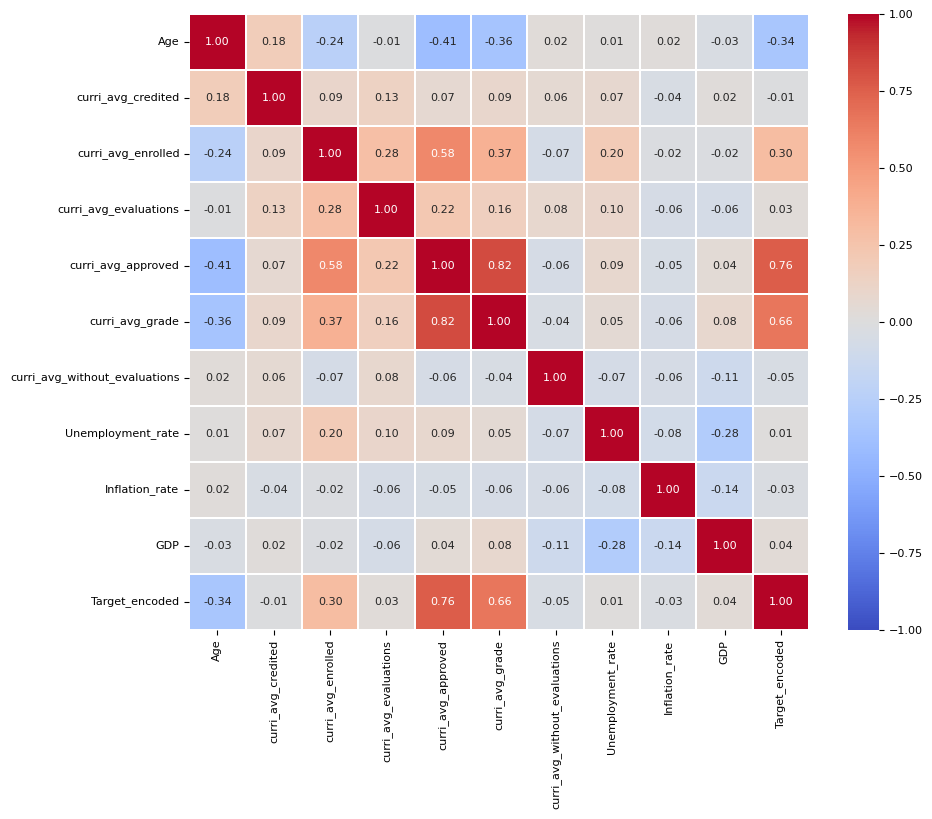

In [ ]:
num_features = stud_selected[['Age', 'curri_avg_credited', 'curri_avg_enrolled',
                              'curri_avg_evaluations', 'curri_avg_approved',
                              'curri_avg_grade', 'curri_avg_without_evaluations',
                              'Unemployment_rate', 'Inflation_rate',
                              'GDP', 'Target_encoded']]

plt.figure(figsize = (10, 8))
plt.rcParams.update({'font.size': 8})
sns.heatmap(num_features.corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0,
            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

<ipython-input-22-2070f4039640>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stud_selected, x='Target_encoded', palette='viridis')


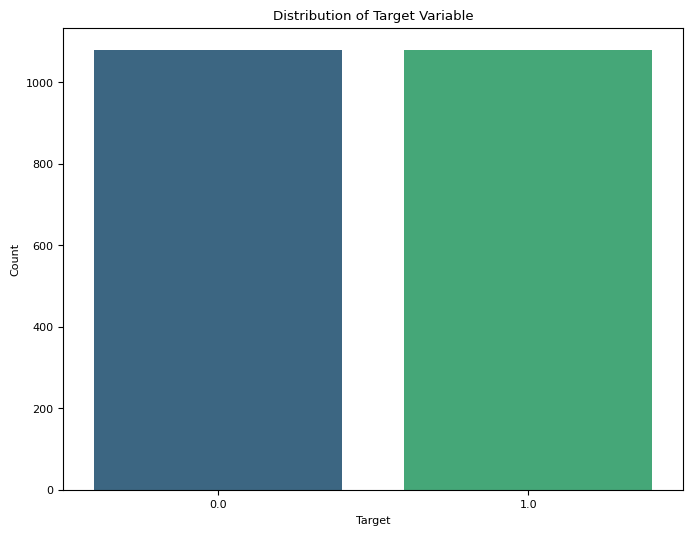

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=stud_selected, x='Target_encoded', palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

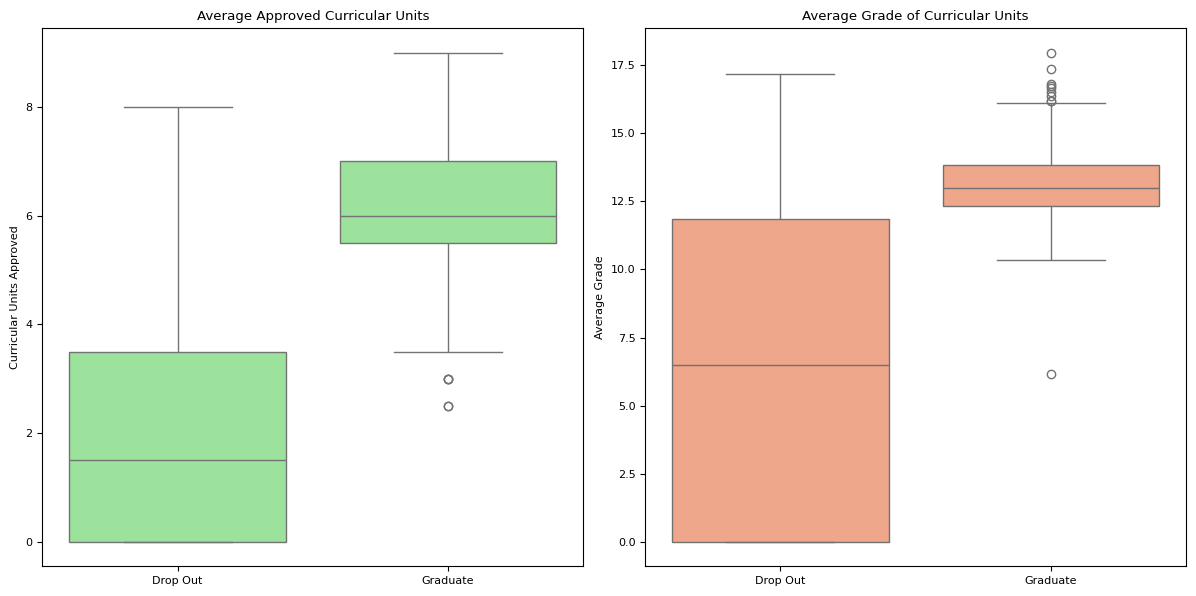

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(data=stud_selected, x='Target_encoded', y='curri_avg_approved',
            color='lightgreen', ax=ax1)
ax1.set_title('Average Approved Curricular Units')
ax1.set_xlabel("")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Drop Out', 'Graduate'])
ax1.set_ylabel('Curricular Units Approved')


sns.boxplot(data=stud_selected, x='Target_encoded', y='curri_avg_grade',
            color='lightsalmon', ax=ax2)
ax2.set_title('Average Grade of Curricular Units')
ax2.set_xlabel("")
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Drop Out', 'Graduate'])
ax2.set_ylabel('Average Grade')

plt.tight_layout()
plt.show()

In [ ]:

stud_selected.loc[(stud_selected['curri_avg_approved'] == 0) & (stud_selected['Target_encoded'] == 1)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Unemployment_rate,Inflation_rate,GDP,Target_encoded,curri_avg_credited,curri_avg_enrolled,curri_avg_evaluations,curri_avg_approved,curri_avg_grade,curri_avg_without_evaluations


In [ ]:
stud_selected = stud_selected.drop(stud_selected.loc[(stud_selected['curri_avg_approved'] == 0) & (stud_selected['Target_encoded'] == 1)].index)


stud_selected.loc[(stud_selected['curri_avg_grade'] == 0) & (stud_selected['Target_encoded'] == 1)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Unemployment_rate,Inflation_rate,GDP,Target_encoded,curri_avg_credited,curri_avg_enrolled,curri_avg_evaluations,curri_avg_approved,curri_avg_grade,curri_avg_without_evaluations


In [ ]:
stud_selected = stud_selected.drop(columns = ['Unemployment_rate', 'Inflation_rate',
                                              'curri_avg_credited', 'curri_avg_evaluations',
                                              'Curricular_units_1st_sem_credited',
                                              'Curricular_units_1st_sem_enrolled',
                                              'Curricular_units_1st_sem_evaluations',
                                              'Curricular_units_1st_sem_approved',
                                              'Curricular_units_1st_sem_grade',
                                              'Curricular_units_1st_sem_without_evaluations',
                                              'Curricular_units_2nd_sem_credited',
                                              'Curricular_units_2nd_sem_enrolled',
                                              'Curricular_units_2nd_sem_evaluations',
                                              'Curricular_units_2nd_sem_approved',
                                              'Curricular_units_2nd_sem_grade',
                                              'Curricular_units_2nd_sem_without_evaluations'])

In [ ]:
stud_selected.head(25)


,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age,GDP,Target_encoded,curri_avg_enrolled,curri_avg_approved,curri_avg_grade,curri_avg_without_evaluations
2,1,1,5,5,1,1,22,27,10,10,...,0,1,0,19,1.74,0.0,6.0,0.0,0.000000,0.0
7,1,9,4,11,1,1,22,27,10,10,...,0,1,0,22,-4.06,0.0,5.0,0.0,0.000000,0.0
9,1,1,1,10,1,1,1,14,5,8,...,0,0,0,18,3.51,0.0,6.0,3.5,12.450000,0.0
12,1,1,2,16,1,1,13,27,5,10,...,1,0,0,19,-1.70,0.0,6.0,0.0,0.000000,0.0
15,1,1,1,15,1,1,13,27,10,4,...,1,0,0,20,-4.06,0.0,6.0,2.5,6.600000,0.0
35,1,12,1,1,1,1,23,27,10,7,...,0,1,0,37,3.51,0.0,7.0,0.5,5.000000,0.0
36,1,12,1,7,1,8,19,27,1,1,...,1,1,0,43,0.32,0.0,5.0,0.0,0.000000,0.0
39,1,15,1,8,1,14,4,4,4,7,...,0,0,0,20,1.79,0.0,6.0,3.0,11.833333,0.0
40,1,1,5,15,1,1,3,3,3,3,...,1,0,0,18,-1.70,0.0,5.5,2.0,6.375000,0.0
43,1,8,1,15,1,1,1,28,6,6,...,0,0,0,20,1.79,0.0,6.0,4.5,13.400000,0.0


#Train model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

In [ ]:
train, test = train_test_split(stud_selected, test_size = 0.2,
                               stratify = stud_selected['Target_encoded'], random_state = 0)

train_features = train.drop('Target_encoded', axis = 1)
train_labels = train['Target_encoded']
test_features = test.drop('Target_encoded', axis = 1)
test_labels = test['Target_encoded']


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(random_state=0)

param_dist = {
    'n_estimators': [50, 100, 200, 300],         # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],            # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]                   # Whether to bootstrap samples
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1',
    refit=True,
    return_train_score=True
)

random_search.fit(train_features, train_labels)

print("Best Hyperparameters:\n", random_search.best_params_)

best_rf = random_search.best_estimator_

test_predictions = best_rf.predict(test_features)

# Displaying accuracy and classification report results
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy:.5f}")  # Format to 5 decimal places
print("Classification Report:\n", classification_report(test_labels, test_predictions, digits=5))  # 5 decimal places for classification report




Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters:
 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Test Accuracy: 0.90741
Classification Report:
               precision    recall  f1-score   support

         0.0    0.93564   0.87500   0.90431       216
         1.0    0.88261   0.93981   0.91031       216

    accuracy                        0.90741       432
   macro avg    0.90913   0.90741   0.90731       432
weighted avg    0.90913   0.90741   0.90731       432



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import joblib

rf = RandomForestClassifier(random_state=0)

param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1',
    refit=True,
    return_train_score=True
)

random_search.fit(train_features, train_labels)

print("Best Hyperparameters:\n", random_search.best_params_)

best_rf = random_search.best_estimator_

test_predictions = best_rf.predict(test_features)

accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy:.5f}")  # Format to 5 decimal places
print("Classification Report:\n", classification_report(test_labels, test_predictions, digits=5))  # 5 decimal places for classification report


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters:
 {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': False}
Test Accuracy: 0.90741
Classification Report:
               precision    recall  f1-score   support

         0.0    0.94444   0.86574   0.90338       216
         1.0    0.87607   0.94907   0.91111       216

    accuracy                        0.90741       432
   macro avg    0.91026   0.90741   0.90725       432
weighted avg    0.91026   0.90741   0.90725       432



#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# SVM Classifier
svm = SVC(random_state=0)

# Hyperparameter space
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Randomized Search
svm_search = RandomizedSearchCV(svm, param_distributions=param_dist_svm, n_iter=20, cv=3, verbose=2, n_jobs=-1)
svm_search.fit(train_features, train_labels)

# Best Model and Predictions
svm_best = svm_search.best_estimator_
svm_predictions = svm_best.predict(test_features)

# Display the best hyperparameters
print("Best Hyperparameters:\n", svm_search.best_params_)

# Evaluation
accuracy = accuracy_score(test_labels, svm_predictions)
print(f"SVM Accuracy: {accuracy:.5f}")

# Classification report with metrics rounded to 5 decimal places
report = classification_report(test_labels, svm_predictions, digits=5)
print("SVM Classification Report:\n", report)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters:
 {'kernel': 'linear', 'gamma': 'auto', 'C': 0.1}
SVM Accuracy: 0.91435
SVM Classification Report:
               precision    recall  f1-score   support

         0.0    0.95431   0.87037   0.91041       216
         1.0    0.88085   0.95833   0.91796       216

    accuracy                        0.91435       432
   macro avg    0.91758   0.91435   0.91419       432
weighted avg    0.91758   0.91435   0.91419       432



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a pipeline for preprocessing and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(random_state=0))   # SVM Classifier
])

# Define the hyperparameter space for RandomizedSearchCV
param_dist_svm = {
    'svm__C': [0.1, 1, 10, 100],                  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],     # Kernel type
    'svm__gamma': ['scale', 'auto']               # Kernel coefficient
}

# Define a StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search with Stratified K-Fold
svm_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist_svm,
    n_iter=50,                               # Increased iterations
    cv=cv,                                   # Use StratifiedKFold
    verbose=2,
    n_jobs=-1,
    scoring='f1_macro',                      # Change scoring metric if needed
    random_state=42,
    return_train_score=True                  # Include training scores
)

# Fit the RandomizedSearchCV to the training data
svm_search.fit(train_features, train_labels)

# Best Model and Predictions
svm_best = svm_search.best_estimator_
svm_predictions = svm_best.predict(test_features)

# Evaluation with five decimal places
print("Best Hyperparameters:\n", svm_search.best_params_)
print(f"SVM Accuracy: {accuracy_score(test_labels, svm_predictions):.5f}")
print("SVM Classification Report:\n", classification_report(test_labels, svm_predictions, digits=5))
print("Confusion Matrix:\n", confusion_matrix(test_labels, svm_predictions))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters:
 {'svm__kernel': 'linear', 'svm__gamma': 'scale', 'svm__C': 0.1}
SVM Accuracy: 0.91898
SVM Classification Report:
               precision    recall  f1-score   support

         0.0    0.96410   0.87037   0.91484       216
         1.0    0.88186   0.96759   0.92274       216

    accuracy                        0.91898       432
   macro avg    0.92298   0.91898   0.91879       432
weighted avg    0.92298   0.91898   0.91879       432

Confusion Matrix:
 [[188  28]
 [  7 209]]


#Neural Network


In [ ]:
# 必要なライブラリのインポート
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Neural Network Classifier
nn = MLPClassifier(random_state=0)

# Hyperparameter space
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# Randomized Search
nn_search = RandomizedSearchCV(nn, param_distributions=param_dist_nn, n_iter=20, cv=3, verbose=2, n_jobs=-1)
nn_search.fit(train_features, train_labels)

# Best Model and Predictions
nn_best = nn_search.best_estimator_
nn_predictions = nn_best.predict(test_features)

# Display the best hyperparameters
print("Best Hyperparameters:\n", nn_search.best_params_)

# Evaluation
accuracy = accuracy_score(test_labels, nn_predictions)
print(f"NN Accuracy: {accuracy:.5f}")

# Classification report with metrics rounded to 5 decimal places
report = classification_report(test_labels, nn_predictions, digits=5)
print("NN Classification Report:\n", report)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters:
 {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'activation': 'tanh'}
NN Accuracy: 0.91204
NN Classification Report:
               precision    recall  f1-score   support

         0.0    0.93627   0.88426   0.90952       216
         1.0    0.89035   0.93981   0.91441       216

    accuracy                        0.91204       432
   macro avg    0.91331   0.91204   0.91197       432
weighted avg    0.91331   0.91204   0.91197       432



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

# Neural Network Classifier
nn = MLPClassifier(random_state=0, max_iter=500, early_stopping=True)

# Extended Hyperparameter Space
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-4, 1, 6),  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32, 64, 128]
}

# Stratified K-Folds Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Randomized Search
nn_search = RandomizedSearchCV(
    nn,
    param_distributions=param_dist_nn,
    n_iter=50,  # Increase the number of iterations for a thorough search
    cv=cv,
    scoring=['accuracy', 'roc_auc'],
    refit='roc_auc',  # Focus on AUC optimization if classes are imbalanced
    verbose=2,
    n_jobs=-1
)
nn_search.fit(train_features, train_labels)

# Best Model and Predictions
nn_best = nn_search.best_estimator_
nn_predictions = nn_best.predict(test_features)

# Evaluation with outputs formatted to five decimal places
print("Best Parameters:", nn_search.best_params_)
print(f"NN Accuracy: {accuracy_score(test_labels, nn_predictions):.5f}")
print(f"NN AUC Score: {roc_auc_score(test_labels, nn_best.predict_proba(test_features)[:, 1]):.5f}")
print("NN Classification Report:\n", classification_report(test_labels, nn_predictions, digits=5))


TypeError: Parameter grid for parameter 'alpha' is not iterable or a distribution (value=0.01)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define Neural Network with best parameters
nn_best = MLPClassifier(
    solver='adam',
    learning_rate='adaptive',
    hidden_layer_sizes=(100,),
    batch_size=32,
    alpha=0.01,
    activation='logistic',
    random_state=0,
    max_iter=500,  # You can increase this if needed for convergence
    early_stopping=True
)

# Train model
nn_best.fit(train_features, train_labels)

# Predictions
nn_predictions = nn_best.predict(test_features)
nn_probabilities = nn_best.predict_proba(test_features)[:, 1]

# Evaluation
print(f"NN Accuracy: {accuracy_score(test_labels, nn_predictions):.5f}")
print(f"NN AUC Score: {roc_auc_score(test_labels, nn_probabilities):.5f}")
print("NN Classification Report:\n", classification_report(test_labels, nn_predictions, digits=5))


NN Accuracy: 0.92130
NN AUC Score: 0.95210
NN Classification Report:
               precision    recall  f1-score   support

         0.0    0.96429   0.87500   0.91748       216
         1.0    0.88559   0.96759   0.92478       216

    accuracy                        0.92130       432
   macro avg    0.92494   0.92130   0.92113       432
weighted avg    0.92494   0.92130   0.92113       432



#Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Initialize the model
lr = LinearRegression()

# Fit the model using the train set
lr.fit(train_features, train_labels)

# Make predictions on the test set
lr_predictions = lr.predict(test_features)

# Evaluate the model
mse_lr = mean_squared_error(test_labels, lr_predictions)
r2_lr = r2_score(test_labels, lr_predictions)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R² Score:", r2_lr)

Linear Regression MSE: 0.08651008671317939
Linear Regression R² Score: 0.6539596531472824


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge regression with cross-validation to find the best alpha
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)

# Fit the model on the training set
ridge.fit(train_features, train_labels)

# Make predictions on the test set
ridge_predictions = ridge.predict(test_features)

# Evaluate the model
mse_ridge = mean_squared_error(test_labels, ridge_predictions)
r2_ridge = r2_score(test_labels, ridge_predictions)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R² Score:", r2_ridge)
print("Optimal alpha:", ridge.alpha_)


Ridge Regression MSE: 0.08663104999475575
Ridge Regression R² Score: 0.653475800020977
Optimal alpha: 10.0


In [ ]:
from sklearn.linear_model import LassoCV

# Initialize Lasso regression with cross-validation
lasso = LassoCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)

# Fit the model on the training set
lasso.fit(train_features, train_labels)

# Make predictions on the test set
lasso_predictions = lasso.predict(test_features)

# Evaluate the model
mse_lasso = mean_squared_error(test_labels, lasso_predictions)
r2_lasso = r2_score(test_labels, lasso_predictions)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R² Score:", r2_lasso)
print("Optimal alpha:", lasso.alpha_)


Lasso Regression MSE: 0.1038163836691816
Lasso Regression R² Score: 0.5847344653232736
Optimal alpha: 0.1


#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=0)

# Define hyperparameter space
param_dist_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

# Randomized Search with cross-validation
logreg_search = RandomizedSearchCV(log_reg, param_distributions=param_dist_logreg, n_iter=20, cv=3, verbose=2, n_jobs=-1)
logreg_search.fit(train_features, train_labels)

# Best model and predictions
logreg_best = logreg_search.best_estimator_
logreg_predictions = logreg_best.predict(test_features)

# Evaluation with outputs formatted to five decimal places
print("Best Hyperparameters:\n", logreg_search.best_params_)
print(f"Logistic Regression Accuracy: {accuracy_score(test_labels, logreg_predictions):.5f}")
print("Logistic Regression Classification Report:\n", classification_report(test_labels, logreg_predictions, digits=5))



Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters:
 {'solver': 'liblinear', 'max_iter': 100, 'C': 1}
Logistic Regression Accuracy: 0.90972
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0    0.94030   0.87500   0.90647       216
         1.0    0.88312   0.94444   0.91275       216

    accuracy                        0.90972       432
   macro avg    0.91171   0.90972   0.90961       432
weighted avg    0.91171   0.90972   0.90961       432



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform
from sklearn.metrics import make_scorer

# Feature Scaling
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=0)

# Expanded hyperparameter space with loguniform distribution for 'C'
param_dist_logreg = {
    'C': loguniform(0.001, 100),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced', None],
    'penalty': ['l1', 'l2']
}

# Define scorer for RandomizedSearchCV
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Randomized Search with cross-validation and updated scoring
logreg_search = RandomizedSearchCV(log_reg, param_distributions=param_dist_logreg, n_iter=30, cv=5,
                                   scoring=scorer, verbose=2, n_jobs=-1, random_state=0)
logreg_search.fit(train_features_scaled, train_labels)

# Best model and predictions
logreg_best = logreg_search.best_estimator_
logreg_predictions = logreg_best.predict(test_features_scaled)
logreg_probabilities = logreg_best.predict_proba(test_features_scaled)[:, 1]

# Evaluation with outputs formatted to five decimal places
print("Best Hyperparameters:\n", logreg_search.best_params_)
print(f"Logistic Regression Accuracy: {accuracy_score(test_labels, logreg_predictions):.5f}")
print(f"ROC AUC Score: {roc_auc_score(test_labels, logreg_probabilities):.5f}")
print("Logistic Regression Classification Report:\n", classification_report(test_labels, logreg_predictions, digits=5))



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:
 {'C': 0.19087614756145965, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.91435
ROC AUC Score: 0.95336
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0    0.94975   0.87500   0.91084       216
         1.0    0.88412   0.95370   0.91759       216

    accuracy                        0.91435       432
   macro avg    0.91693   0.91435   0.91422       432
weighted avg    0.91693   0.91435   0.91422       432



#Bentchmark Test

In [ ]:
import time
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Initialize dictionaries to store results
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'ROC AUC': [],
    'Training Time (s)': [],
    'Prediction Time (s)': []
}

models = {
    "Random Forest": best_rf,
    "SVM": svm_best,
    "Neural Network": nn_best,
    "Logistic Regression": logreg_best
}

# Iterate over models to evaluate performance
for model_name, model in models.items():
    # Timing the training process
    start_train = time.time()
    model.fit(train_features, train_labels)  # Fit to training data
    end_train = time.time()
    train_time = end_train - start_train

    # Timing the prediction process
    start_pred = time.time()
    if model_name == "Neural Network" or model_name == "Logistic Regression":  # Probabilistic AUC for specific models
        test_probs = model.predict_proba(test_features)[:, 1]
        test_preds = model.predict(test_features)
    else:
        test_preds = model.predict(test_features)
        test_probs = model.predict_proba(test_features)[:, 1] if hasattr(model, "predict_proba") else None
    end_pred = time.time()
    pred_time = end_pred - start_pred

    # Evaluate accuracy, F1 score, and AUC
    accuracy = accuracy_score(test_labels, test_preds)
    f1 = f1_score(test_labels, test_preds, average='macro')  # Adjust to 'binary' if binary classification
    auc = roc_auc_score(test_labels, test_probs) if test_probs is not None else None

    # Append results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(auc)
    results['Training Time (s)'].append(train_time)
    results['Prediction Time (s)'].append(pred_time)

# Convert results to DataFrame for easy visualization
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1 Score   ROC AUC  Training Time (s)  \
0        Random Forest  0.907407  0.907246  0.953704           0.821363   
1                  SVM  0.918981  0.918790       NaN           0.047558   
2       Neural Network  0.921296  0.921127  0.952096           1.404964   
3  Logistic Regression  0.907407  0.907280  0.953639           0.138194   

   Prediction Time (s)  
0             0.057407  
1             0.008676  
2             0.020491  
3             0.007407  


#Confusion Matrix


Random Forest Confusion Matrix:
[[187  29]
 [ 11 205]]

SVM Confusion Matrix:
[[188  28]
 [  7 209]]

Neural Network Confusion Matrix:
[[189  27]
 [  7 209]]

Logistic Regression Confusion Matrix:
[[188  28]
 [ 12 204]]



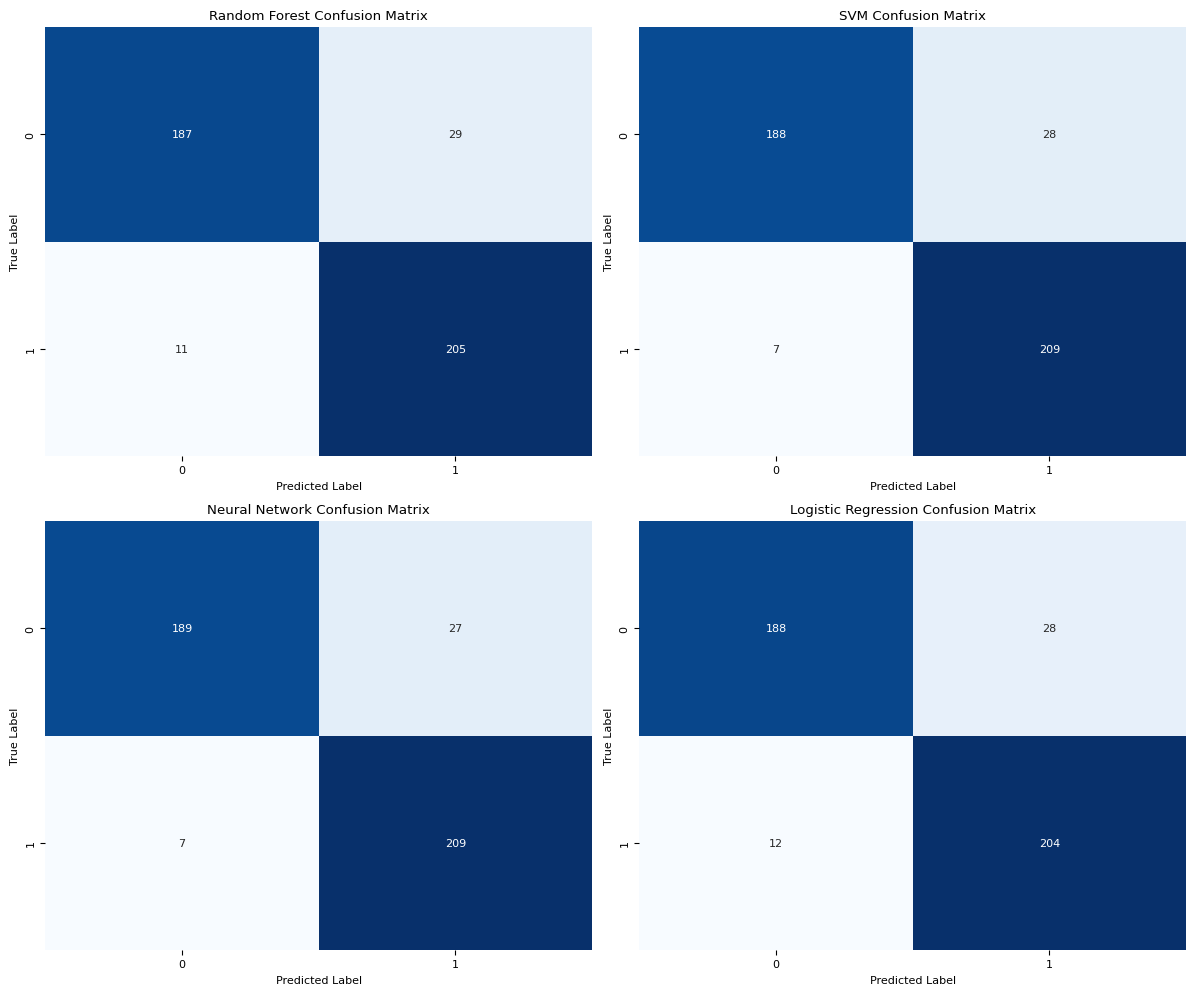

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a 2x2 grid for displaying the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten the 2x2 grid to iterate easily

# Plot confusion matrix for each model
for i, (model_name, model) in enumerate(models.items()):
    test_preds = model.predict(test_features)
    cm = confusion_matrix(test_labels, test_preds)

    # Print confusion matrix values to the console
    print(f'{model_name} Confusion Matrix:\n{cm}\n')

    # Plot heatmap with annotated values
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots if there are fewer than 4 models
for j in range(i + 1, 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




#Precision, Recall, and Specificity

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision, recall, and specificity for each model
for model_name, model in models.items():
    test_preds = model.predict(test_features)
    precision = precision_score(test_labels, test_preds, average='macro')
    recall = recall_score(test_labels, test_preds, average='macro')
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Specificity calculation for binary case

    print(f"{model_name} - Precision: {precision:.4f}, Recall: {recall:.4f}, Specificity: {specificity:.4f}")


Random Forest - Precision: 0.9103, Recall: 0.9074, Specificity: 0.8704
SVM - Precision: 0.9230, Recall: 0.9190, Specificity: 0.8704
Neural Network - Precision: 0.9249, Recall: 0.9213, Specificity: 0.8704
Logistic Regression - Precision: 0.9097, Recall: 0.9074, Specificity: 0.8704


#ROC Curve Analysis

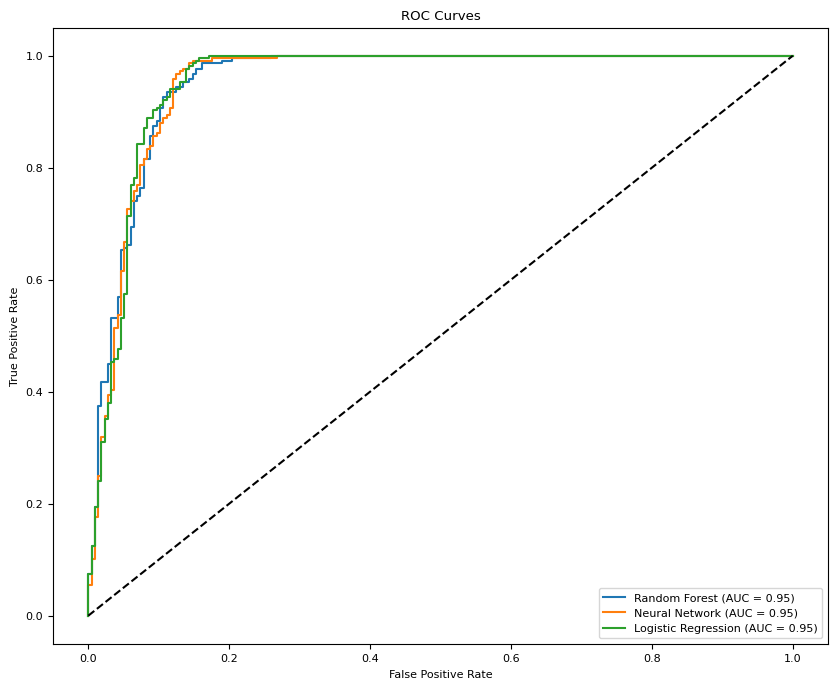

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if model_name in ["Neural Network", "Logistic Regression"]:
        test_probs = model.predict_proba(test_features)[:, 1]
    else:
        test_probs = model.predict_proba(test_features)[:, 1] if hasattr(model, "predict_proba") else None

    if test_probs is not None:
        fpr, tpr, _ = roc_curve(test_labels, test_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()


#Learning Curves

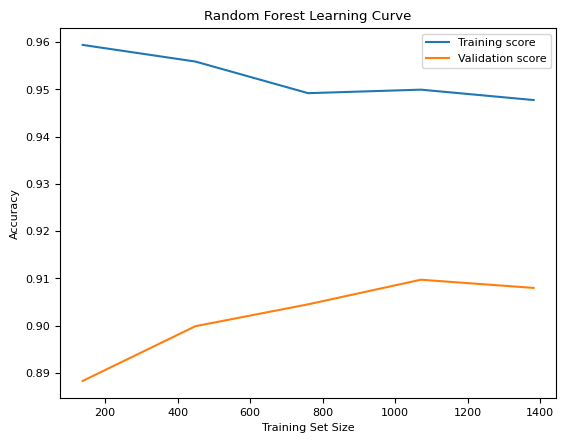

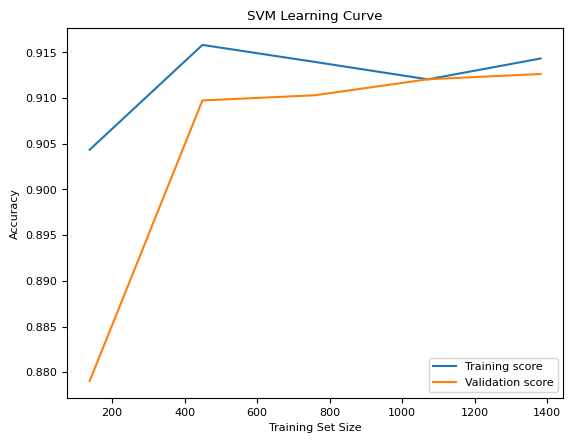

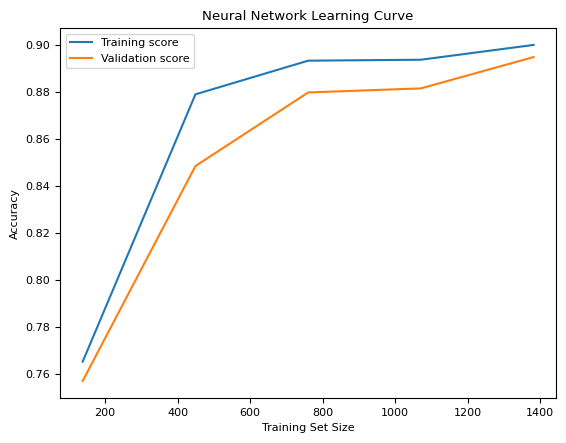

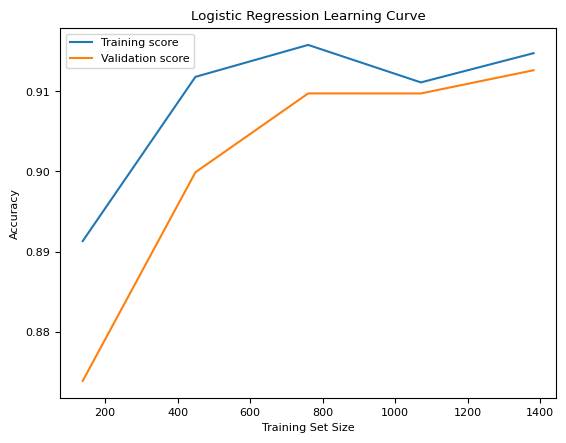

In [ ]:
from sklearn.model_selection import learning_curve

# Plot learning curves for each model
for model_name, model in models.items():
    train_sizes, train_scores, val_scores = learning_curve(model, train_features, train_labels, cv=cv, scoring='accuracy')
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, val_mean, label='Validation score')
    plt.title(f"{model_name} Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()


#Cross Cross-Validation Score Analysis

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation accuracy for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, train_features, train_labels, cv=cv, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.9080 ± 0.0108
SVM Cross-Validation Accuracy: 0.9126 ± 0.0133
Neural Network Cross-Validation Accuracy: 0.8918 ± 0.0110
Logistic Regression Cross-Validation Accuracy: 0.9126 ± 0.0117


#McNemar’s Test for Classifier Comparison

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

# Compare Random Forest and SVM predictions using McNemar's test
rf_preds = models["Random Forest"].predict(test_features)
svm_preds = models["SVM"].predict(test_features)

# Create contingency table
contingency_table = pd.crosstab(rf_preds == test_labels, svm_preds == test_labels)
result = mcnemar(contingency_table)
print(f"McNemar's Test p-value (Random Forest vs. SVM): {result.pvalue:.4f}")


McNemar's Test p-value (Random Forest vs. SVM): 0.1797


# Permutation Feature Importance

In [ ]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Initialize an empty DataFrame to store feature importances
feature_importances = pd.DataFrame(index=train_features.columns)

# Calculate feature importances for each model and add them as columns
for model_name, model in models.items():
    result = permutation_importance(model, test_features, test_labels, n_repeats=10, random_state=0)
    feature_importances[model_name] = result.importances_mean

# Sort by the feature importance of the first model (or any model)
feature_importances = feature_importances.sort_values(by=list(models.keys())[0], ascending=False)

# Display feature importances in a horizontal format
print(feature_importances)



                               Random Forest           SVM  Neural Network  \
curri_avg_approved              2.905093e-01  3.483796e-01        0.242824   
Tuition_fees_up_to_date         3.055556e-02  3.402778e-02        0.012037   
curri_avg_grade                 1.319444e-02  2.546296e-03        0.096991   
curri_avg_enrolled              1.018519e-02  3.287037e-02        0.023148   
Debtor                          3.472222e-03  5.092593e-03        0.016898   
Course                          6.944444e-04  5.787037e-03        0.017824   
Mother_occupation               6.944444e-04  3.009259e-03        0.006481   
Application_mode                6.944444e-04  1.388889e-03        0.014120   
Scholarship_holder              2.220446e-17  2.546296e-03       -0.000926   
curri_avg_without_evaluations   0.000000e+00  1.110223e-17        0.000463   
Daytime/evening_attendance      0.000000e+00  2.314815e-03        0.006019   
Previous_qualification          0.000000e+00 -1.851852e-03      

#Calibration Curves

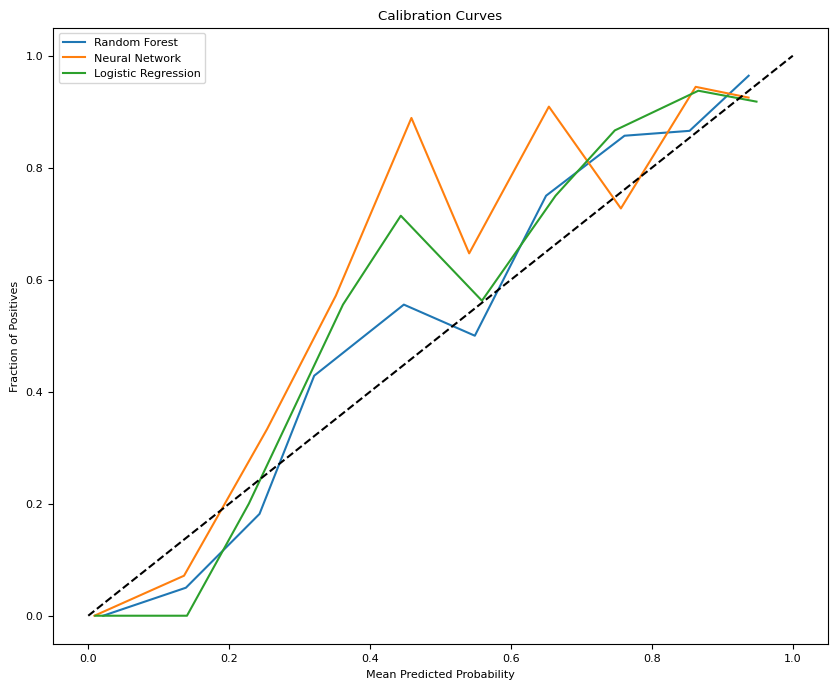

In [ ]:
from sklearn.calibration import calibration_curve

# Plot calibration curve for each model with probability outputs
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(test_features)[:, 1]
        fraction_of_positives, mean_predicted_value = calibration_curve(test_labels, probs, n_bins=10)
        plt.plot(mean_predicted_value, fraction_of_positives, label=model_name)

plt.plot([0, 1], [0, 1], "k--")  # Reference line for a perfectly calibrated model
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curves")
plt.legend(loc="upper left")
plt.show()


#Model Stability Test

In [ ]:
from sklearn.utils import resample

# Stability test: retrain on subsamples and track accuracy
stability_results = {name: [] for name in models.keys()}
for i in range(5):  # Repeat 5 times
    X_resample, y_resample = resample(train_features, train_labels, random_state=i)
    for model_name, model in models.items():
        model.fit(X_resample, y_resample)
        acc = accuracy_score(test_labels, model.predict(test_features))
        stability_results[model_name].append(acc)

# Display stability results as averages with standard deviations
for model_name, accuracies in stability_results.items():
    print(f"{model_name} Stability Test - Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")


Random Forest Stability Test - Mean Accuracy: 0.9065 ± 0.0060
SVM Stability Test - Mean Accuracy: 0.9144 ± 0.0041
Neural Network Stability Test - Mean Accuracy: 0.9028 ± 0.0069
Logistic Regression Stability Test - Mean Accuracy: 0.9093 ± 0.0017
